##  For short time, it works well, but for long time it is not good enough....

In [0]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import tensorflow as tf
import pandas as pd
tf.__version__
import matplotlib
import matplotlib.pyplot as plt

In [0]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


In [0]:
# data

train_dataset=pd.read_csv('Time_series_train',names='F')
test_dataset=pd.read_csv('Time_series_vali',names='F')

In [0]:
train_dataset=pd.DataFrame.to_numpy(train_dataset)
test_dataset=pd.DataFrame.to_numpy(test_dataset)


In [0]:
train_dataset

array([[ 2.4867 ],
       [ 2.0966 ],
       [ 1.7634 ],
       ...,
       [-0.31407],
       [-0.27373],
       [-0.17997]])

In [0]:
# prepare batch

t_min, t_max=0, 600
resolution=0.1
#batch_size=50 #
#n_steps=20  #
def next_batch(batch_size,n_steps,dataset):
  sample_list=range(1,len(dataset)-n_steps)
  from random import sample
  train_sample=np.array(sample(sample_list,batch_size)).reshape(batch_size,1)
  index=train_sample+np.arange(0, n_steps + 1) 
  ys=dataset[index]
  return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)
  



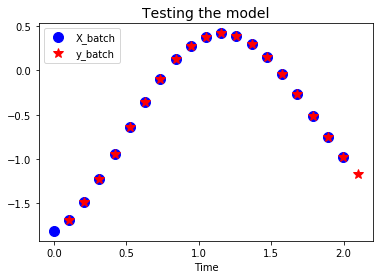

In [0]:
n_steps=20
t_instance = np.linspace(0, 0 + resolution * (n_steps + 1), n_steps + 1)
x_batch,y_batch=next_batch(1,n_steps,train_dataset)
t_instance = np.linspace(0, 0 + resolution * (n_steps + 1), n_steps + 1)
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], x_batch.reshape(n_steps), "bo", markersize=10, label="X_batch")
plt.plot(t_instance[1:], y_batch.reshape(n_steps), "r*", markersize=10, label="y_batch")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.show()

In [0]:
t_min, t_max = 0, 300
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps,train):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In [0]:
X_batch,y_batch=next_batch(1,20,train_dataset)
np.c_[X_batch, y_batch]

array([[[-38.88168089, -37.78482937],
        [-37.78482937, -36.02920045],
        [-36.02920045, -33.84675544],
        [-33.84675544, -31.48963957],
        [-31.48963957, -29.17112018],
        [-29.17112018, -27.01686515],
        [-27.01686515, -25.03845692],
        [-25.03845692, -23.13558531],
        [-23.13558531, -21.12633325],
        [-21.12633325, -18.79808441],
        [-18.79808441, -15.96652611],
        [-15.96652611, -12.52823316],
        [-12.52823316,  -8.49388443],
        [ -8.49388443,  -3.99390148],
        [ -3.99390148,   0.74495339],
        [  0.74495339,   5.44637471],
        [  5.44637471,   9.84333653],
        [  9.84333653,  13.73462632],
        [ 13.73462632,  17.02533718],
        [ 17.02533718,  19.74149232]]])

In [0]:
reset_graph()

n_steps =20
n_inputs = 1
n_neurons = 200
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)

In [0]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)


#%%
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()


#%%
saver = tf.train.Saver()




In [0]:

#%%
n_iterations = 2000
batch_size = 30

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps,train_dataset)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_time_series_model") # not shown in the book


#%%


0 	MSE: 903.5538
100 	MSE: 17.185387
200 	MSE: 3.056966
300 	MSE: 0.8412251
400 	MSE: 3.6955538
500 	MSE: 0.8422633
600 	MSE: 1.7821434
700 	MSE: 0.81817573
800 	MSE: 1.0632371
900 	MSE: 1.2369071
1000 	MSE: 0.9508936
1100 	MSE: 1.2240368
1200 	MSE: 1.5159734
1300 	MSE: 1.0333472
1400 	MSE: 0.9088561
1500 	MSE: 0.79175335
1600 	MSE: 1.1503804
1700 	MSE: 1.3937645
1800 	MSE: 1.1048776
1900 	MSE: 1.0986254


In [0]:
t_instance = np.linspace(0, 0 + resolution * (n_steps + 1), n_steps + 1)
X_new,y_new=next_batch(1,n_steps ,test_dataset)
X_new

array([[[63.08969356],
        [67.08894524],
        [70.61341105],
        [73.39832954],
        [75.19511349],
        [75.82773231],
        [75.23301932],
        [73.47506467],
        [70.73018226],
        [67.24612638],
        [63.28552077],
        [59.06731155],
        [54.72052218],
        [50.26156079],
        [45.60054829],
        [40.57501575],
        [35.0026051 ],
        [28.7397421 ],
        [21.73177707],
        [14.04216839]]])

In [0]:
with tf.Session() as sess:                          # not shown in the book
    saver.restore(sess, "./my_time_series_model")   # not shown
    y_pred = sess.run(outputs, feed_dict={X: X_new})

#%%

INFO:tensorflow:Restoring parameters from ./my_time_series_model


In [0]:
y_pred.reshape(n_steps)

array([-0.6933069 , -0.482144  , -0.32288703, -0.10323536,  0.18689543,
        0.45283636,  0.66558516,  0.9127936 ,  1.1046014 ,  1.2615987 ,
        1.2502531 ,  1.1876708 ,  1.0132055 ,  0.7196193 ,  0.34160265,
       -0.09387505, -0.5486464 , -0.9930797 , -1.3694235 , -1.646485  ],
      dtype=float32)

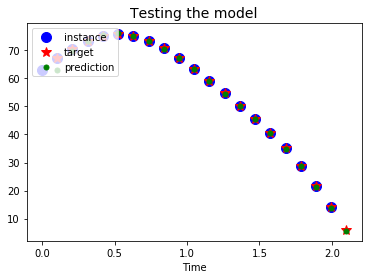

In [0]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], X_new.reshape(n_steps), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], y_new.reshape(n_steps), "r*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "g.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.show()

## **Multi layer LSTM cell**

In [0]:
n_steps = 50
n_inputs = 1
n_neurons = 250
n_outputs = 1
n_layers = 4
n_iterations=1000
learning_rate = 0.001
X_batch,y_batch=next_batch(1,n_steps,train_dataset)



In [0]:
reset_graph()

lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)

In [0]:

#!
keep_prob = tf.placeholder_with_default(1.0, shape=())
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)
              for layer in range(n_layers)]
multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)



In [0]:
learning_rate = 0.001

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()


In [0]:
n_iterations = 1000
batch_size = 20
n_epochs = 5

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
      for iteration in range(n_iterations):
          X_batch, y_batch = next_batch(batch_size, n_steps,train_dataset)
          _, mse = sess.run([training_op, loss],
                            feed_dict={X: X_batch, y: y_batch})
                                      
          if iteration % 100 == 0:                   # not shown in the book
              print(iteration, "Training MSE:", mse) # not shown
    
    saver.save(sess, "./my_dropout_time_series_model")

0 Training MSE: 1.0034363
100 Training MSE: 0.036900286
200 Training MSE: 0.008242148
300 Training MSE: 0.0032495114
400 Training MSE: 0.0029990738
500 Training MSE: 0.0031715154
600 Training MSE: 0.0027139855
700 Training MSE: 0.0030388972
800 Training MSE: 0.002754239
900 Training MSE: 0.0027793143
0 Training MSE: 0.0021228704
100 Training MSE: 0.0018782631
200 Training MSE: 0.0018893189
300 Training MSE: 0.0022713053
400 Training MSE: 0.0023898133
500 Training MSE: 0.0018511438
600 Training MSE: 0.0018450213
700 Training MSE: 0.0021530772
800 Training MSE: 0.0016892502
900 Training MSE: 0.0019605556
0 Training MSE: 0.0025978507
100 Training MSE: 0.0014339921
200 Training MSE: 0.0015485698
300 Training MSE: 0.0016070077
400 Training MSE: 0.0016326407
500 Training MSE: 0.0012991762
600 Training MSE: 0.0014377678
700 Training MSE: 0.0013259513
800 Training MSE: 0.00179647
900 Training MSE: 0.0020961193
0 Training MSE: 0.0011749163
100 Training MSE: 0.0010435767
200 Training MSE: 0.0021

In [0]:
t_instance = np.linspace(0, 0 + resolution * (n_steps + 1), n_steps + 1)
X_new,y_new=next_batch(1,n_steps ,test_dataset)
X_new


array([[[ 1.8215   ],
        [ 1.8965   ],
        [ 1.8392   ],
        [ 1.5974   ],
        [ 1.2162   ],
        [ 0.79917  ],
        [ 0.30396  ],
        [-0.23213  ],
        [-0.68204  ],
        [-1.0393   ],
        [-1.3222   ],
        [-1.4737   ],
        [-1.4755   ],
        [-1.3779   ],
        [-1.1603   ],
        [-0.85376  ],
        [-0.52845  ],
        [-0.12873  ],
        [ 0.26895  ],
        [ 0.64432  ],
        [ 1.0386   ],
        [ 1.3526   ],
        [ 1.606    ],
        [ 1.8283   ],
        [ 1.9111   ],
        [ 1.8345   ],
        [ 1.6503   ],
        [ 1.3148   ],
        [ 0.93335  ],
        [ 0.48088  ],
        [-0.015481 ],
        [-0.35247  ],
        [-0.60998  ],
        [-0.80296  ],
        [-0.81512  ],
        [-0.79804  ],
        [-0.7046   ],
        [-0.53039  ],
        [-0.42291  ],
        [-0.228    ],
        [-0.0088805],
        [ 0.20694  ],
        [ 0.47457  ],
        [ 0.71538  ],
        [ 0.93739  ],
        [ 

In [0]:
with tf.Session() as sess:                          # not shown in the book
    saver.restore(sess, "./my_dropout_time_series_model")   # not shown
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./my_dropout_time_series_model


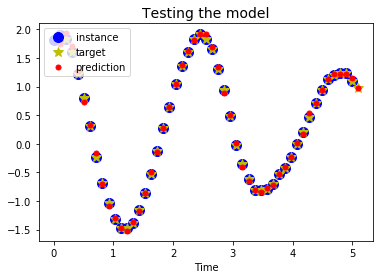

In [0]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], X_new.reshape(n_steps), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], y_new.reshape(n_steps), "y*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.show()

In [0]:
number=20
sequence=train_dataset[0:n_steps].reshape(n_steps)
sequence=sequence.tolist()
with tf.Session() as sess:  
   saver.restore(sess, "./my_dropout_time_series_model") 
   for iteration in range(number):
     X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
     y_pred = sess.run(outputs, feed_dict={X: X_batch})
     sequence.append(y_pred[0, -1, 0])   

INFO:tensorflow:Restoring parameters from ./my_dropout_time_series_model


In [0]:
X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
X_batch

array([[[2.5321    ],
        [2.6064    ],
        [2.5989    ],
        [2.5625    ],
        [2.5141    ],
        [2.3836    ],
        [2.2579    ],
        [2.0716    ],
        [1.7932    ],
        [1.4862    ],
        [1.162     ],
        [0.82405   ],
        [0.54584   ],
        [0.38108   ],
        [0.31518   ],
        [0.36211   ],
        [0.49803   ],
        [0.72178   ],
        [1.0038    ],
        [1.3241    ],
        [1.6646    ],
        [2.0192    ],
        [2.3753    ],
        [2.6487    ],
        [2.8353    ],
        [2.9613    ],
        [2.951     ],
        [2.7842    ],
        [2.5187    ],
        [2.166     ],
        [1.7587961 ],
        [1.34339738],
        [0.9546352 ],
        [0.64397901],
        [0.41679364],
        [0.26163596],
        [0.18761988],
        [0.18490267],
        [0.25768894],
        [0.41897559],
        [0.65894693],
        [0.97430474],
        [1.34516716],
        [1.73110044],
        [2.10324097],
        [2

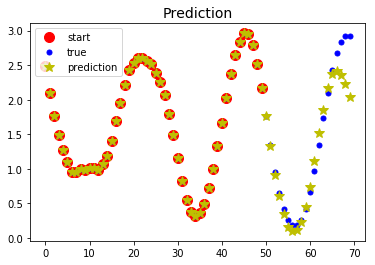

In [0]:
plt.title("Prediction", fontsize=14)
plt.plot( np.array(sequence[0:n_steps]).reshape(n_steps), "ro", markersize=10, label="start")
plt.plot( np.array(sequence).reshape(number+n_steps), "b.", markersize=10, label="true")
plt.plot(train_dataset[0:number+n_steps].reshape(number+n_steps),"y*", markersize=10, label="prediction")
plt.legend(loc="upper left")

In [0]:

sequence